In [11]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Reading in the CSV file using pandas and printing the first 5 rows
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Checking for null values
df.isnull().values.any()

False

In [14]:
# Checking for duplicates
df.duplicated().any()

False

Credit Score: The distribution is slightly skewed left, with a mean of 650-750. This indicates we are dealing with a wide range of FICO scores, with most customers falling into the subprime, near prime, and prime credit categories.

Age: The distribution is skewed to the right, meaning most customers are middle-aged (30-50).

Tenure: Most customers have been with this bank for 1 to 9 years. The bank should focus on acquiring new customers while keeping current customers engaged, especially since there is a sharp decline in tenure beyond 9 years.

Balance: Many customers have a balance of zero, followed by a normal distribution if we ignore the zero balances. This suggests that these might be checking or savings accounts, given the high range of balances (50,000-200,000). Most customers seem to choose not to keep large sums of money in their accounts.

Product Number: Most customers have 1-2 products out of a possible 4.

Estimated Salary: The range is 0 to 200,000, with equally represented data points across this range.

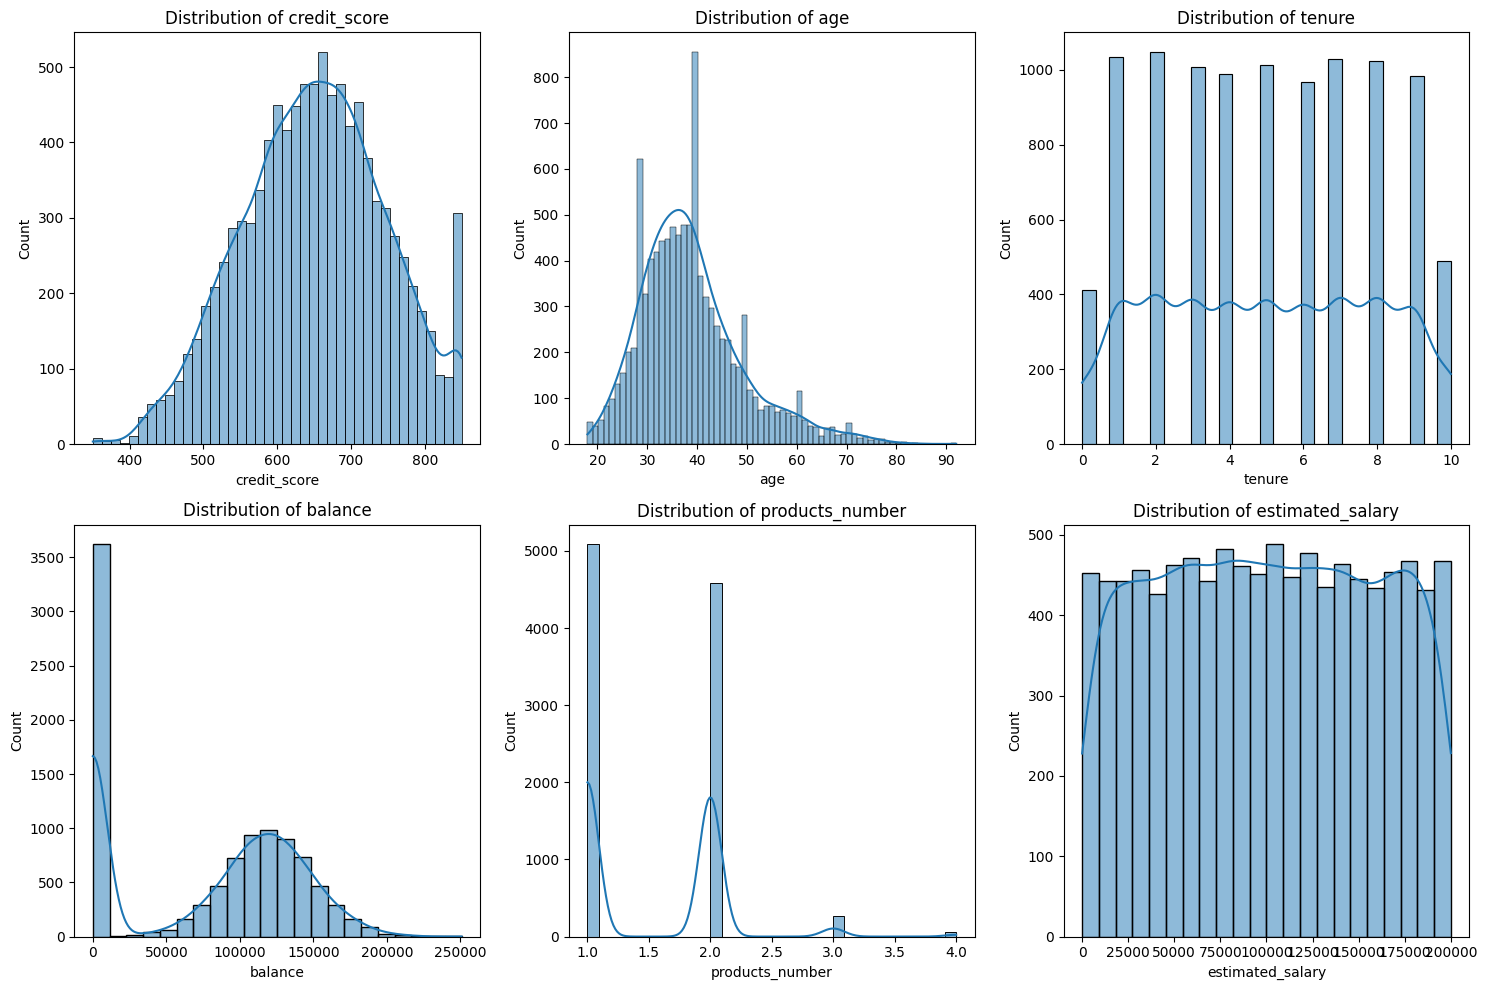

In [15]:
# Distribution of numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
# Exploratory Data Anlaysis(EDA)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The graph shows that customers who churned are between 40-50 years of age, so there should be a strong focus on this age group to improve retention rates. The bank should also investigate why customers between 30 and 40 are churning. Another interesting area to explore is the difference between a 40-year-old who has churned and one who hasn’t. What factors in their lives may have led to the decision to churn or stay? Is there a pattern among other 40-year-olds with similar data? Investigating these patterns could provide deeper insights into customer behavior.

<Axes: xlabel='age', ylabel='Count'>

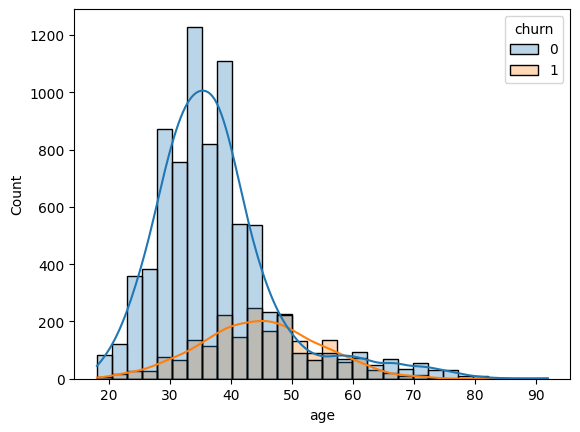

In [16]:
# More EDA by creating a subplot of churn over age
sns.histplot(x = 'age', data = df, hue='churn',bins=30,kde=True,alpha=0.3)

I plotted Credit Score vs. Age to examine the distribution from another perspective. Using a scatter plot (or a box plot) highlights outliers more effectively compared to other methods.

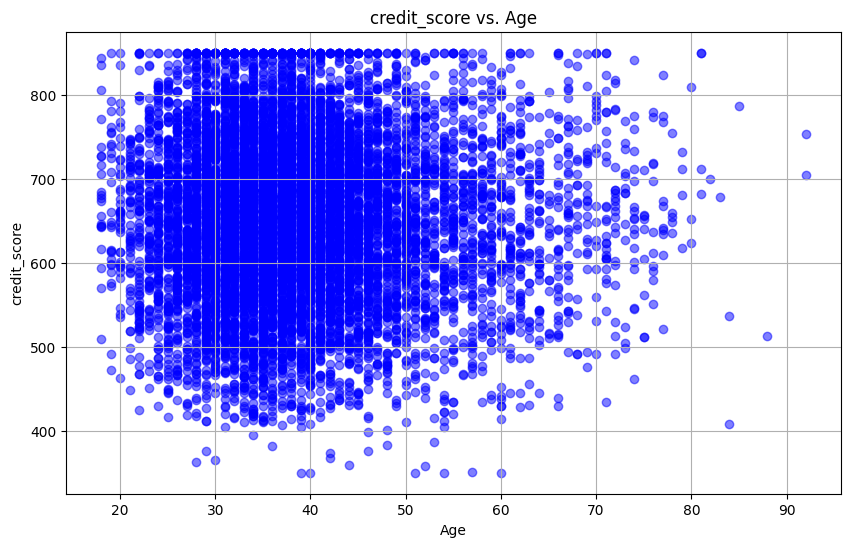

In [17]:
# EDA: Scatterplot for a different perspective on credit vs age
plt.figure(figsize=(10, 6)) 
plt.scatter(df['age'], df['credit_score'], color='blue', alpha=0.5)  # Create a scatter plot

plt.title('credit_score vs. Age')  
plt.xlabel('Age')  
plt.ylabel('credit_score') 

plt.grid(True)  
plt.show() 

The percentage of customers that churned is 20.36%

Percentage of customers that churned: 
20.369999999999997


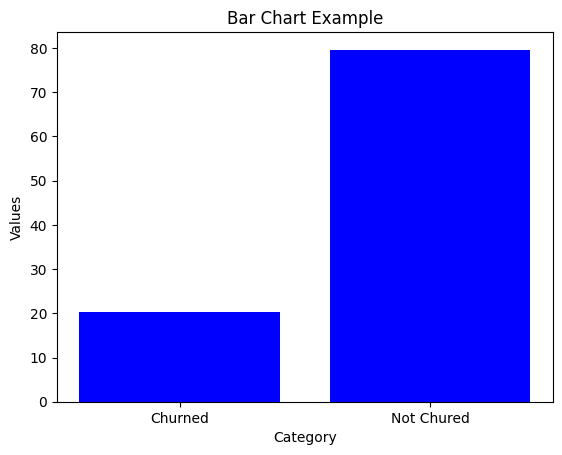

In [18]:
# Creates the bar chart
cat= ['Churned', 'Not Chured']
val=[(df['churn'].sum()/df['churn'].count())*100, (1-(df['churn'].sum()/df['churn'].count()))*100]
plt.bar(cat, val, color='blue')

plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Chart Example')
print( "Percentage of customers that churned: ")
print((df['churn'].sum()/df['churn'].count())*100 )

We can see that most customers in this dataset are from France. They also have the highest number of unchurned customers.

<Axes: xlabel='country', ylabel='count'>

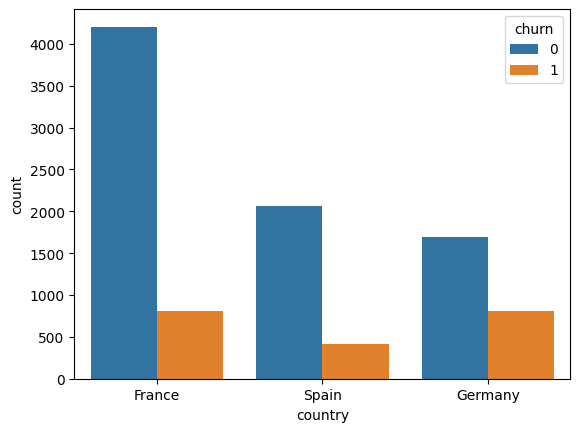

In [19]:
#Creates a bar chart of country and churn count respective to each country
sns.countplot(x='country', hue = 'churn',data = df)

Looking through a stacked bar chart, we can see that Germany has the highest proportion of churned to non-churned customers compared to the other two countries.

churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413


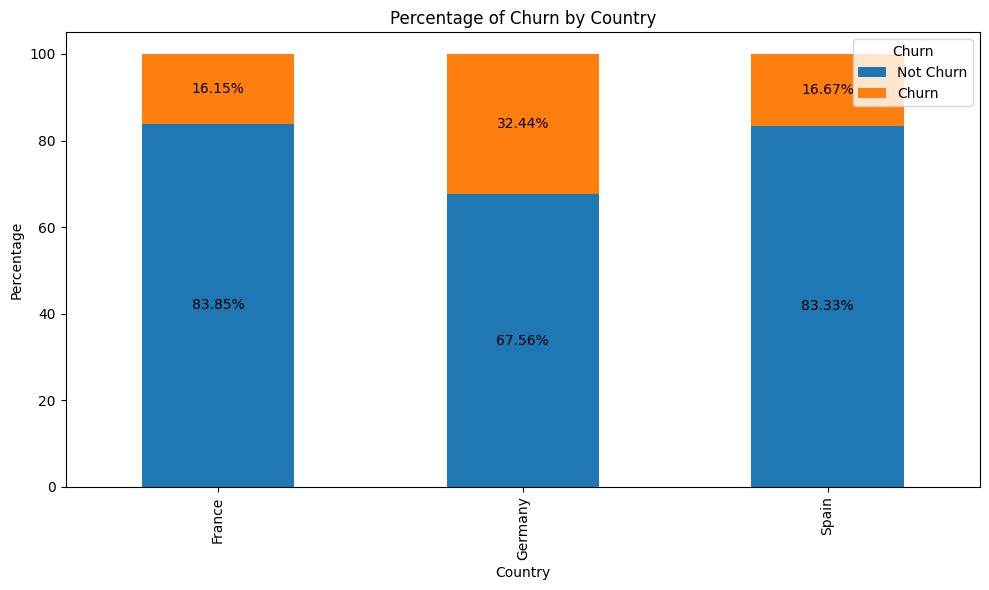

In [20]:
# Calculate percentage of churn within each country
country_churn = df.groupby(['country', 'churn']).size().unstack(fill_value=0)
print(country_churn)

# Calculates the percentage
country_churn_percent = country_churn.div(country_churn.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = country_churn_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Percentage of Churn by Country')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

for country in ax.containers:
    ax.bar_label(country, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()


There are more males who have not churned; however, there is a greater proportion of churned females compared to non-churned females.

churn      0     1
gender            
Female  3404  1139
Male    4559   898


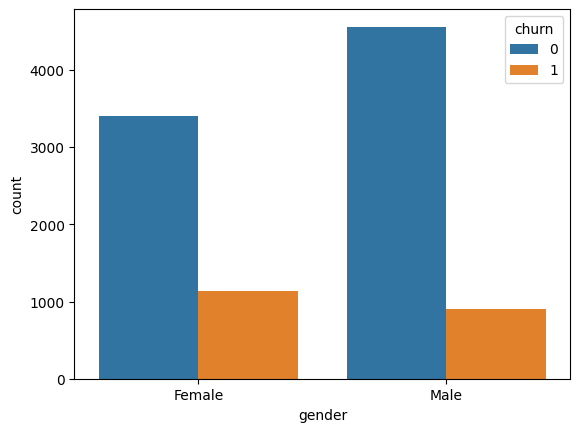

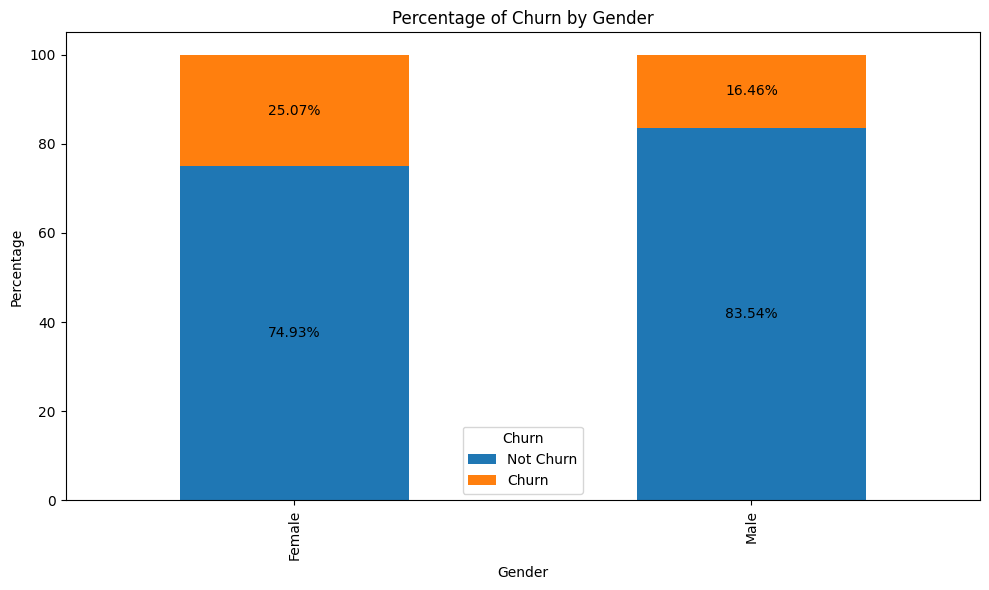

In [21]:
sns.countplot(x='gender', hue='churn', data=df)
# Calculate percentage of churn within each gender
gender_churn = df.groupby(['gender', 'churn']).size().unstack(fill_value=0)
print(gender_churn)
# Calculate percentages
gender_churn_percent = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = gender_churn_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Churn by Gender')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

# Adding percentage text on the center of each bar
for gender in ax.containers:
    ax.bar_label(gender, fmt='%.2f%%', label_type='center')

plt.tight_layout()
plt.show()

The heatmap shows that there are no direct correlations between variables, with the most significant correlation being between age and churn. This makes sense, as the previous graph indicated that customers churned more frequently between the ages of 40-50 compared to those who did not churn, who were mainly between the ages of 30-40.

In [22]:
# Correlation heatmap creation
numerical_data=df.drop(['gender','country'], axis=1)

corr = numerical_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [23]:
#Turning categorical columns into numerical columns while removing dummy variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
labelencoder=LabelEncoder()
features=[1,2,4,7,8]
for feature in features:
    X[:, feature]=labelencoder.fit_transform(X[:,feature])
ct = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(drop='first'), features)
    ],
    remainder= 'passthrough'
)
X=ct.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split( X, y, test_size=0.2, random_state=1000)

#standardizes the training and test sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LReg = LogisticRegression()
LReg.fit(X_train,y_train)
y_pred=LReg.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.797


In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1519   45]
 [ 361   75]]


The Logistic Regression model is 80% accurate, which is somewhat acceptable; however, the dataset is imbalanced, so the accuracy score is biased. This is due to there being more data on customers who haven’t churned, so the model can better predict the probability of a customer not churning, with accuracy scores of 81%, 97%, and 88%. In contrast, the scores for predicting a customer churning are lower, at 62%, 17%, and 27%.

Precision: of all the preditced postives how many were actually positve. TP/(TP+FP)
Recall: How many true positives did the model predict out of all positive instances TP/(TP+FN)
F1-score: This metric is a mean using percision and recall. This metric is useful when trying to balance percision and recall. 2x(precision X recall)/(precision + recall) High f1-scores mean high precision and high recall.
Support: the number of occurences relative to each class 

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1564
           1       0.62      0.17      0.27       436

    accuracy                           0.80      2000
   macro avg       0.72      0.57      0.58      2000
weighted avg       0.77      0.80      0.75      2000



Next we visualize the confusion matrix through a heatmap.
True Positive: The model predicts the positive class(Churned) correctly 75
True Negative:The model predicts the negative class(Not Churned) correctly 1519
False Positive: The model fails to predict the postive class correctly 45
False Negative: The model fails to predict the negative class correctly 361

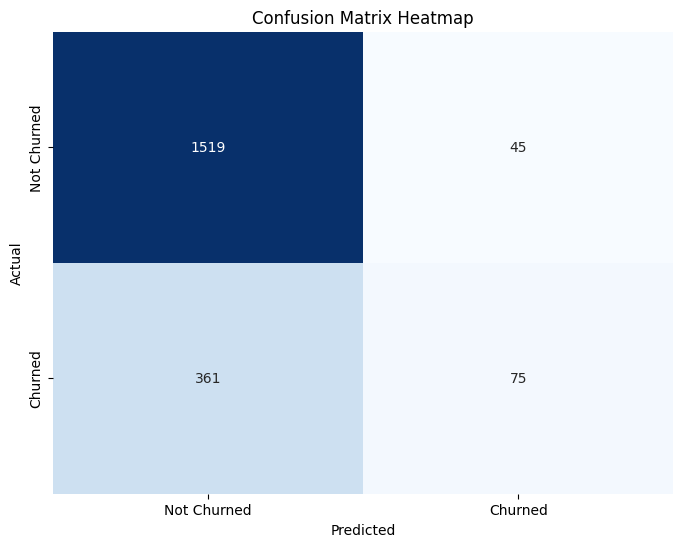

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

To handle this case of bias, we need to use an oversampling method such as the SMOTE method. The Synthetic Minority Over-sampling Technique (SMOTE) algorithm works by selecting one or more k-nearest neighbors from the minority class and generating a synthetic value between the point and its neighbor. Creating synthetic values helps address overfitting commonly seen when duplicating the minority class as another form of oversampling.

In [27]:
#SMOTE implementation
from imblearn.over_sampling import SMOTE

In [28]:
smote =SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test=train_test_split(X_resampled, y_resampled,test_size=.2)

LReg= LogisticRegression(random_state=42)
LReg.fit(X_train, y_train)


c:\Users\yusse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:
#We are adjusting the threshold value of .5 to .4 to help decrease the negative class bias.
y_pred = (LReg.predict_proba(X_test)[:, 1] >= .4).astype(int)

Looking at the results we can see that this model predicts true positives better than the pre-SMOTE model effectively prediciting the customers that will churn at a recall score of 86%.

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      1585
           1       0.66      0.84      0.74      1601

    accuracy                           0.70      3186
   macro avg       0.72      0.70      0.69      3186
weighted avg       0.72      0.70      0.69      3186



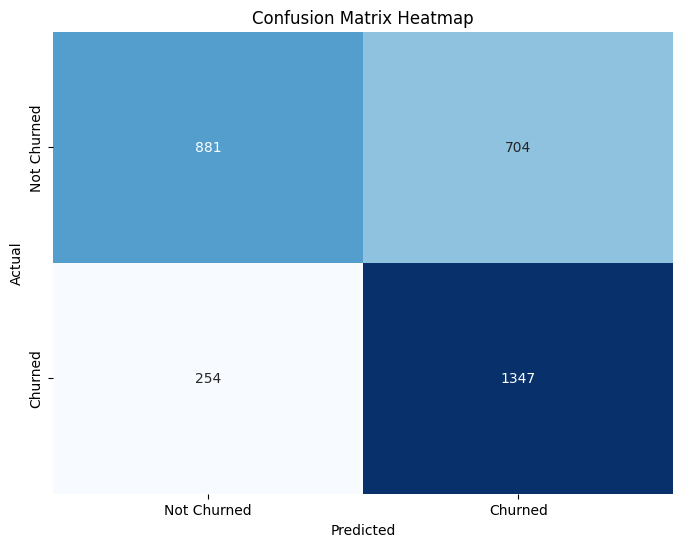

In [30]:
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
# Creates a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Looking back we used a Logistic Regression model that initially yeilded an 80% accuracy rate; However, that initial model was bias due to data imbalance so we oversampled using SMOTE to get a model that better predicts the positive class rather than the negative majority class.

So the model is currently at a recall of 83% but how can we make that better? Does could changing the model we use be better for this dataset and end up outputing a higher recall score? Lets find out!

Decision trees work well on binary datasets like this one by starting with a root node and creating a decision pathway that ends with a leaf node, which represents the final predicted outcome. Within a decision tree, there are multiple decision pathways (branches) that split attributes in a way that provides the best possible predictions.

A Random Forest is a type of ensemble method that uses multiple machine learning algorithms to produce a better model than using just one algorithm alone. Specifically, a random forest employs multiple decision trees (ranging from hundreds to thousands of decision trees). It works by using bootstrap sampling to create random subsets of the dataset and selecting random attributes to generate slightly different decision trees. At the end, these trees are aggregated to deliver the best results. Additionally, random forests help reduce overfitting, improve model accuracy, and handle missing data or outliers better than a single decision tree would.

Out of all 3 models the random forest classifer proves to be the most accurate at 91% compared to 86%(Decision Tree), and 70%(Logistic regression model). This makes sense given that the random forest uses multiple decision trees choose a very accurate model.

In [31]:
# Declaring, fitting, predicintg, and printing the models metrics when using decision trees and random forest
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

rf.fit(X_train,y_train)
dt.fit(X_train,y_train)

rf_pred=rf.predict(X_test)
dt_pred=dt.predict(X_test)

LReg=accuracy_score(y_test, y_pred)
rf_score=accuracy_score(y_test, rf_pred)
dt_score=accuracy_score(y_test, dt_pred)

print("Logistic regression: ", LReg)
print("Decision Tree: ", dt_score)
print("Random Forest: ", rf_score)




Logistic regression:  0.6993094789704959
Decision Tree:  0.8628374136848713
Random Forest:  0.90646578782172


Out of pure curiosity, I wanted to see the results of running the decision tree and random forest on the dependent and independent variables before oversampling. The random forest model was still the most accurate, but it lost 4% accuracy compared to its oversampled variation that we predicted earlier.

In [32]:
# No SMOTE (just out of curiousity)
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
lr=LogisticRegression()

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=.2)

rf.fit(X_train,y_train)
dt.fit(X_train,y_train)
lr.fit(X_train,y_train)


rf_pred=rf.predict(X_test)
dt_pred=dt.predict(X_test)
lr_pred=lr.predict(X_test)
 
LReg=accuracy_score(y_test, lr_pred)
rf_score=accuracy_score(y_test, rf_pred)
dt_score=accuracy_score(y_test, dt_pred)

print("Logistic regression: ", LReg)
print("Decision Tree: ", dt_score)
print("Random Forest: ", rf_score)



Logistic regression:  0.8075
Decision Tree:  0.789
Random Forest:  0.8575


c:\Users\yusse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In conclusion, we were able to build a model with a 90% accuracy score using a random forest after we preprocessed, performed exploratory data analysis (EDA), split the data, trained the model, and applied oversampling.